In [1]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## 분석할 텍스트 읽어오기

In [265]:
with open('Baby,Kids.csv', 'r', encoding='utf8') as f:
  content = f.read()

## 불필요한 심볼 없애기

In [266]:
# String function인 replace를 사용하거나 re를 사용
# cleaned_content = content.replace('!', '').replace(',','').replace('.','').replace('“','').replace('”','').replace('\n','').replace('’','')
korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
cleaned_content = re.sub(r'[^\.\?\!\w\d\s\가-힣]','',content) # 문장단위로 끊기
cleaned_content = re.sub(korean, '', content)
print(cleaned_content)

,title,category
0,   ,"Baby,Kids"
1, /    ,"Baby,Kids"
2,  ,"Baby,Kids"
3,    !    17!,"Baby,Kids"
4,     !,"Baby,Kids"
5,    _,"Baby,Kids"
6,    ,"Baby,Kids"
7,  1+1,"Baby,Kids"
8,    ,"Baby,Kids"
9,  & !,"Baby,Kids"
10,   ,"Baby,Kids"
11,   ♥,"Baby,Kids"
12,  ,"Baby,Kids"
13,    ,"Baby,Kids"
14,   - ,"Baby,Kids"
15,  DIY  ♥,"Baby,Kids"
16,    6P  ,"Baby,Kids"
17,  ver1.,"Baby,Kids"
18,   ! ,"Baby,Kids"
19,Flexmill  & ,"Baby,Kids"
20,  M,"Baby,Kids"
21,1-120 /LER1332_,"Baby,Kids"
22,  - ZAP Love Love,"Baby,Kids"
23,  M 10   /  ,"Baby,Kids"
24,        - 8,"Baby,Kids"
25,  ,"Baby,Kids"
26,     - ,"Baby,Kids"
27,   - ,"Baby,Kids"
28,     - ,"Baby,Kids"
29, 3D   ,"Baby,Kids"
30,   ,"Baby,Kids"
31,   ,"Baby,Kids"
32, ,"Baby,Kids"
33,   /     ,"Baby,Kids"
34,     ! ,"Baby,Kids"
35," - , ","Baby,Kids"
36,  2 ,"Baby,Kids"
37, ,"Baby,Kids"
38,    DIY  ,"Baby,Kids"
39,    ,"Baby,Kids"
40,    !,"Baby,Kids"
41,     A5 Air,"Baby,Kids"
42,     _ ,"Baby,Kids"
43,  /,"Baby,Kids"
44,& ,"Baby,Kids"
45,

In [267]:
cleaned_content = cleaned_content.lower()

In [268]:
word_tokens = nltk.word_tokenize(cleaned_content)
print(word_tokens)

[',', 'title', ',', 'category', '0', ',', ',', "''", 'baby', ',', 'kids', "''", '1', ',', '/', ',', "''", 'baby', ',', 'kids', "''", '2', ',', ',', "''", 'baby', ',', 'kids', "''", '3', ',', '!', '17', '!', ',', "''", 'baby', ',', 'kids', "''", '4', ',', '!', ',', "''", 'baby', ',', 'kids', "''", '5', ',', '_', ',', "''", 'baby', ',', 'kids', "''", '6', ',', ',', "''", 'baby', ',', 'kids', "''", '7', ',', '1+1', ',', "''", 'baby', ',', 'kids', "''", '8', ',', ',', "''", 'baby', ',', 'kids', "''", '9', ',', '&', '!', ',', "''", 'baby', ',', 'kids', "''", '10', ',', ',', "''", 'baby', ',', 'kids', "''", '11', ',', '♥', ',', "''", 'baby', ',', 'kids', "''", '12', ',', ',', "''", 'baby', ',', 'kids', "''", '13', ',', ',', "''", 'baby', ',', 'kids', "''", '14', ',', '-', ',', "''", 'baby', ',', 'kids', "''", '15', ',', 'diy', '♥', ',', "''", 'baby', ',', 'kids', "''", '16', ',', '6p', ',', "''", 'baby', ',', 'kids', "''", '17', ',', 'ver1.', ',', "''", 'baby', ',', 'kids', "''", '18', ',', 

In [269]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[(',', ','), ('title', 'NN'), (',', ','), ('category', 'NN'), ('0', 'CD'), (',', ','), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('1', 'CD'), (',', ','), ('/', 'NN'), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('2', 'CD'), (',', ','), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('3', 'CD'), (',', ','), ('!', '.'), ('17', 'CD'), ('!', '.'), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('4', 'CD'), (',', ','), ('!', '.'), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('5', 'CD'), (',', ','), ('_', 'NN'), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('6', 'CD'), (',', ','), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ','), ('kids', 'NNS'), ("''", "''"), ('7', 'CD'), (',', ','), ('1+1', 'CD'), (',', ','), ("''", "''"), ('baby', 'NN'), (',', ',')

In [270]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)
print(NN_words)

['title', 'category', 'baby', 'kids', '/', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', '_', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', '♥', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'diy', '♥', 'baby', 'kids', 'baby', 'kids', 'ver1.', 'baby', 'kids', 'baby', 'kids', 'flexmill', 'baby', 'kids', 'm', 'baby', 'kids', '/ler1332_', 'baby', 'kids', 'zap', 'love', 'love', 'baby', 'kids', '/', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', '/', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'diy', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', 'air', 'baby', 'kids', '_', 'baby', 'kids', '/', 'baby', 'kids', 'baby', 'kids', 'baby', 'kids', '-welcome', 'party', 'baby', 'kids', 'hello', 'baby_pink', 'baby', 'kids', 'p-edition+', 'baby', 'kids', '_', 'baby', '

In [271]:
# nltk에서 제공되는 WordNetLemmatizer을 이용
# ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['title', 'category', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '_', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '♥', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'diy', '♥', 'baby', 'kid', 'baby', 'kid', 'ver1.', 'baby', 'kid', 'baby', 'kid', 'flexmill', 'baby', 'kid', 'm', 'baby', 'kid', '/ler1332_', 'baby', 'kid', 'zap', 'love', 'love', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'diy', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'air', 'baby', 'kid', '_', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '-welcome', 'party', 'baby', 'kid', 'hello', 'baby_pink', 'baby', 'kid', 'p-edition+', 'baby', 'kid', '_', 'baby', 'kid', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 

In [272]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [273]:
# 실제 작업시에는 txt 파일로 작업하는 걸 추천
customized_stopwords = ['be', 'today', 'yesterday', "it’s", "don’t"] # 직접 만든 불용어 사전

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['title', 'category', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '_', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '♥', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'diy', '♥', 'baby', 'kid', 'baby', 'kid', 'ver1.', 'baby', 'kid', 'baby', 'kid', 'flexmill', 'baby', 'kid', 'baby', 'kid', '/ler1332_', 'baby', 'kid', 'zap', 'love', 'love', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'diy', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', 'air', 'baby', 'kid', '_', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid', 'baby', 'kid', '-welcome', 'party', 'baby', 'kid', 'hello', 'baby_pink', 'baby', 'kid', 'p-edition+', 'baby', 'kid', '_', 'baby', 'kid', 'baby', 'kid', '/', 'baby', 'kid', 'baby', 'kid'

In [274]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'baby': 10804, 'kid': 10803, '_': 543, '/': 64, 'diy': 39, '+': 31, 'pu': 31, '[': 27, 'rab': 25, '__': 24, 'ar': 22, 'bag': 21, '-_': 20, 'b': 20, 'sloth': 20, 'set': 17, 'cd': 17, 'case': 13, 'x': 12, 'set_': 11, 'eq': 11, 'pvc': 11, '/_': 9, 'hat': 9, 'animal': 8, 'st': 8, 'pencil': 8, 'ankle_': 7, 'blue': 7, '%': 7, 'star': 7, 'storage': 7, 'vsp': 7, 'air': 6, 'eva': 6, 'l': 6, 'c': 6, '·': 6, 'pink': 6, 'pp': 6, 'ver.t': 6, 'cloud': 6, 'race': 6, 'ribbon': 6, 'pack': 5, 'mini': 5, 'loris': 5, 'korat': 5, 'x2': 5, 'l.o.l': 5, 'border': 5, 'kit': 5, '_4': 4, '__2': 4, '//': 4, 'day': 4, 'lunch': 4, 'r': 4, 'w': 4, 'qr': 4, 'x3': 4, 'school': 4, 'wallet': 4, 'coast': 4, 'party': 3, 'rainbow': 3, 'cover': 3, '_5': 3, '_7': 3, 'shape': 3, 'bamboo': 3, 'friend': 3, 'book': 3, 'mint': 3, 'k': 3, 'f': 3, '-3': 3, '-8': 3, '+_': 3, 'jr': 3, 'color': 3, 'beige': 3, 'jane': 3, 'kc': 3, 'mpl': 3, 'rc': 3, 'sport': 3, 'art': 3, 'sack': 3, 'acapulco': 3, 'kid`s': 3, 'check': 3, 'pocket

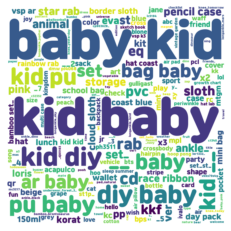

In [275]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'Jalnan.ttf' # For Korean characters

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(background_color = "white", \
              width = 1000, \
              height=1000, \
              max_font_size=400, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [276]:
wordcloud.to_file("Baby,Kids_Wordcloud_Eng.png")